<a href="https://colab.research.google.com/github/Nidhi89717/ML/blob/main/13-DBSCAN/02_DBSCAN_Hyperparameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DBSCAN Hyperparameters



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
two_blobs = pd.read_csv('gdrive/My Drive/csv_files/cluster_two_blobs.csv')

In [4]:
two_blobs_outliers = pd.read_csv('gdrive/My Drive/csv_files/cluster_two_blobs_outliers.csv')

In [5]:
two_blobs.head()

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215


In [6]:
two_blobs_outliers.head()

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215


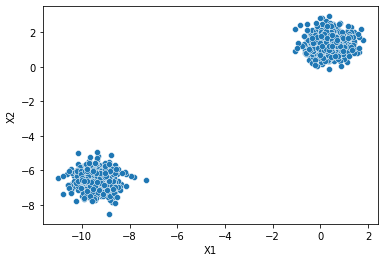

In [7]:
sns.scatterplot(data=two_blobs,x='X1',y='X2');

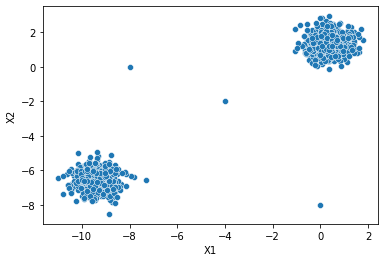

In [8]:
sns.scatterplot(data=two_blobs_outliers,x='X1',y='X2');

In [9]:
def display_category(model,data):
  labels = model.fit_predict(data)
  sns.scatterplot(data=data,x='X1',y='X2',hue=labels,palette='Set1')

In [10]:
from sklearn.cluster import DBSCAN

In [11]:
dbscan = DBSCAN()

In [ ]:
help(DBSCAN)

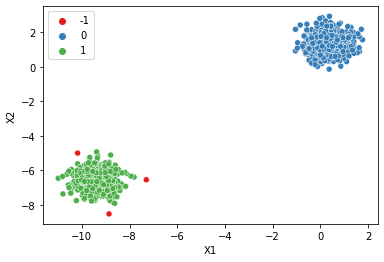

In [13]:
display_category(dbscan,two_blobs)

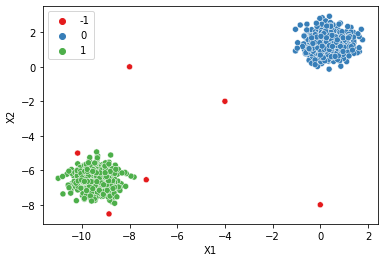

In [14]:
display_category(dbscan,two_blobs_outliers)

# Epsilon

    eps : float, default=0.5
     |      The maximum distance between two samples for one to be considered
     |      as in the neighborhood of the other. This is not a maximum bound
     |      on the distances of points within a cluster. This is the most
     |      important DBSCAN parameter to choose appropriately for your data set
     |      and distance function.

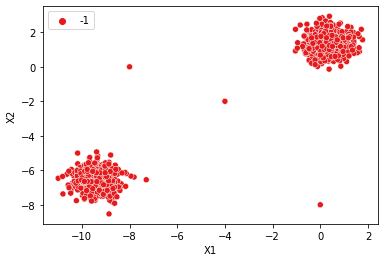

In [15]:
dbscan = DBSCAN(eps=0.001)
display_category(dbscan,two_blobs_outliers)

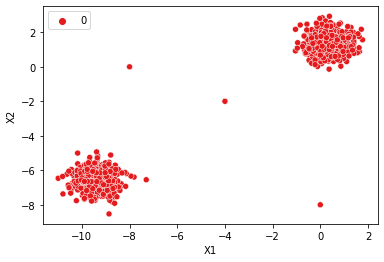

In [16]:
dbscan = DBSCAN(eps=10)
display_category(dbscan,two_blobs_outliers)

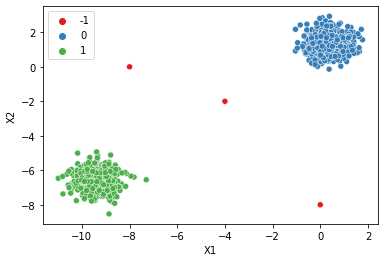

In [17]:
dbscan = DBSCAN(eps=1)
display_category(dbscan,two_blobs_outliers)

In [18]:
# Total outliers found
np.sum(dbscan.labels_ == -1)

3

In [19]:
# Percent of points classified as outliers
100* np.sum(dbscan.labels_ == -1)/len(dbscan.labels_)

0.29910269192422734

In [20]:
# Total number of clusters
len(np.unique(dbscan.labels_))

3

## Charting reasonable Epsilon values

In [50]:
outlier_percent = []
number_of_outlier = []

for eps in np.linspace(0.001,10,100):
  dbscan = DBSCAN(eps=eps)
  dbscan.fit(two_blobs_outliers)

  number_of_outlier.append(np.sum(dbscan.labels_ == -1))  

  perc_outlier = 100* np.sum(dbscan.labels_ == -1)/len(dbscan.labels_)
  outlier_percent.append(perc_outlier)

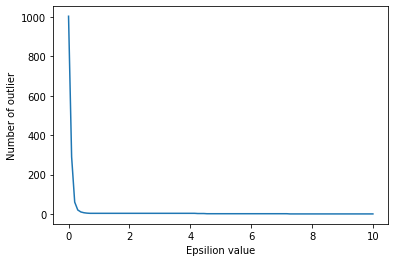

In [22]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outlier)
plt.ylabel('Number of outlier')
plt.xlabel('Epsilion value');

(0.0, 2.0)

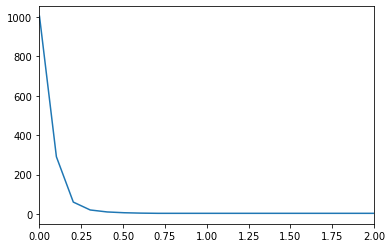

In [23]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outlier)
plt.xlim(0,2)

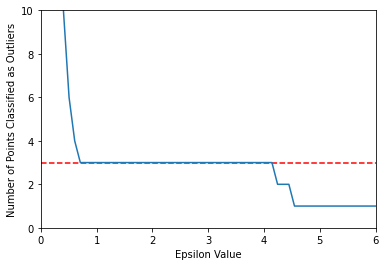

In [52]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outlier)
plt.ylabel("Number of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.ylim(0,10)
plt.xlim(0,6)
plt.hlines(y=3,xmin=0,xmax=10,colors='red',ls='--')

In [29]:
outlier_percent = []
number_of_outlier = []

for eps in np.linspace(0.001,7,200):
  dbscan = DBSCAN(eps=eps)
  dbscan.fit(two_blobs_outliers)

  number_of_outlier.append(np.sum(dbscan.labels_ == -1))  

  perc_outlier = 100* np.sum(dbscan.labels_ == -1)/len(dbscan.labels_)
  outlier_percent.append(perc_outlier)

(0.0, 2.0)

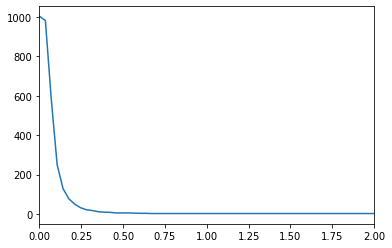

In [30]:
sns.lineplot(x=np.linspace(0.001,7,200),y=number_of_outlier)
plt.xlim(0,2)

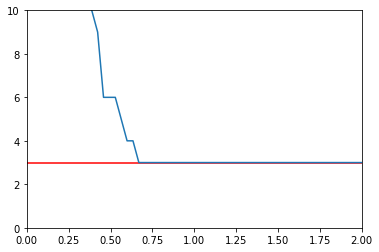

In [31]:
sns.lineplot(x=np.linspace(0.001,7,200),y=number_of_outlier)
plt.xlim(0,2)
plt.ylim(0,10)
plt.hlines(y=3,xmin=0,xmax=2,color='red')

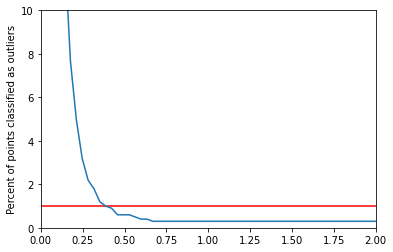

In [35]:
sns.lineplot(x=np.linspace(0.001,7,200),y=outlier_percent)
plt.xlim(0,2)
plt.ylim(0,10)
plt.hlines(y=1,xmin=0,xmax=2,color='red')
plt.ylabel('Percent of points classified as outliers');

In [36]:
outlier_percent = []
number_of_outlier = []

for eps in np.linspace(0.001,1,100):
  dbscan = DBSCAN(eps=eps)
  dbscan.fit(two_blobs_outliers)

  number_of_outlier.append(np.sum(dbscan.labels_ == -1))  

  perc_outlier = 100* np.sum(dbscan.labels_ == -1)/len(dbscan.labels_)
  outlier_percent.append(perc_outlier)

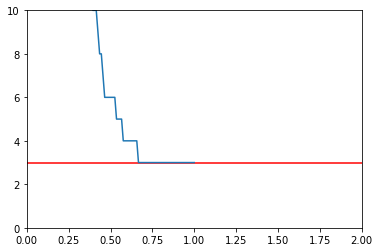

In [39]:
sns.lineplot(x=np.linspace(0.001,1,100),y=number_of_outlier)
plt.xlim(0,2)
plt.ylim(0,10)
plt.hlines(y=3,xmin=0,xmax=2,color='red')

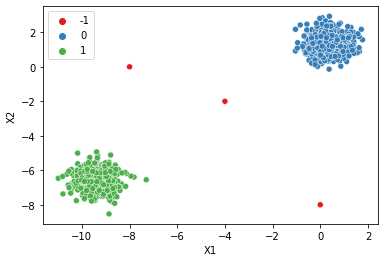

In [43]:
dbscan = DBSCAN(eps=0.75)
display_category(dbscan,two_blobs_outliers)

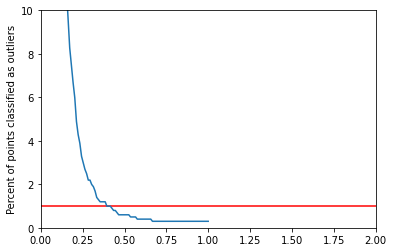

In [40]:
sns.lineplot(x=np.linspace(0.001,1,100),y=outlier_percent)
plt.xlim(0,2)
plt.ylim(0,10)
plt.hlines(y=1,xmin=0,xmax=2,color='red')
plt.ylabel('Percent of points classified as outliers');

## Minimum Samples

     |  min_samples : int, default=5
     |      The number of samples (or total weight) in a neighborhood for a point
     |      to be considered as a core point. This includes the point itself.
     


In [41]:
outlier_percent = []
number_of_outlier = []

for n in np.arange(1,100):
  dbscan = DBSCAN(min_samples=n)
  dbscan.fit(two_blobs_outliers)

  number_of_outlier.append(np.sum(dbscan.labels_ == -1))  

  perc_outlier = 100* np.sum(dbscan.labels_ == -1)/len(dbscan.labels_)
  outlier_percent.append(perc_outlier)

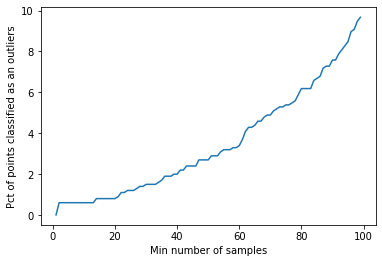

In [42]:
sns.lineplot(x=np.arange(1,100),y=outlier_percent)
plt.xlabel('Min number of samples')
plt.ylabel('Pct of points classified as an outliers');

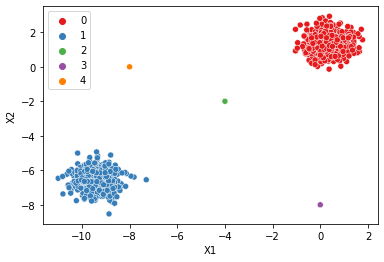

In [44]:
dbscan = DBSCAN(min_samples=1,eps=0.75)
display_category(dbscan,two_blobs_outliers)

In [48]:
two_blobs_outliers.shape[1]

2

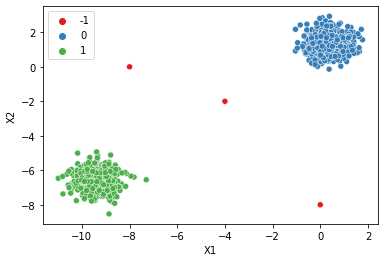

In [49]:
num_dim = two_blobs_outliers.shape[1]
dbscan = DBSCAN(min_samples=2*num_dim,eps=0.75)
display_category(dbscan,two_blobs_outliers)